## INSURANCE DATA
#### PROBLEM STATEMENT: Identify and predict the right insurance charges for each customer


### IMPORTING LIBRARIES


In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### IMPORTING DATASET

In [178]:
data = pd.read_csv('Insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [179]:
data.size

9366

In [180]:
data.shape

(1338, 7)

In [181]:
# data has no missing values
# there are 7 columns and 1338 rows

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### DATA INFORMATION:
   1.  No of rows = 1338
   2. No of columns = 7
   3. No missing values are there
   
   4. Chategorical = sex, smoker, region
   5. Numerical columns = age, bmi, children count, charges


##### Here there are no numerical missing values so we don't need to deal with them

### DEALING WITH CHATEGORICAL DATA

In [182]:
## finding unique values in the data
data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

### CHATEGORICAL ROWS:
    1. SEX = Nominal data
    2. SMOKER = Nominal data
    3. REGION = Nominal data
    
    ALL NOMINAL DATA HENCE WE WILL CREATE A SPARSE MATRIX USING GET DUMMIES FUNCTION

In [183]:
data = pd.get_dummies(data, drop_first=True)

In [184]:
data.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


### SKEWNESS OF DATA

##### We see there is a slight differnce in the mean and median values of the numerical column. Hence we can say it has a little skewness in the data



In [185]:
data.describe()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.505232,0.204783,0.242900,0.272048,0.242900
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.403694,0.428995,0.445181,0.428995
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000


### VISUAL REPRESENTATION OF THE COLUMNS TO CHECK FOR SKEWNESS AND OUTLIERS

As there is not much skewness oF data we will not be dealing with it

<AxesSubplot:>

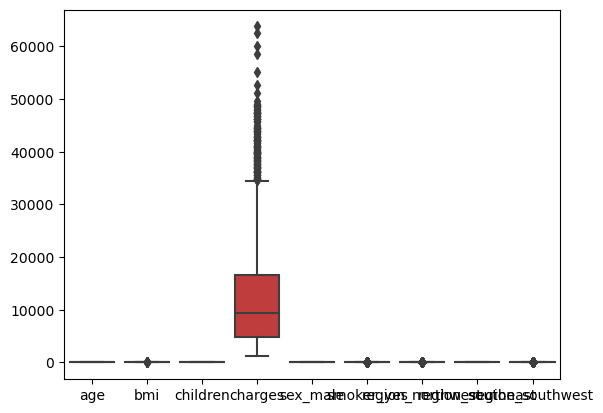

In [186]:
sns.boxplot(data = data)

<AxesSubplot:xlabel='bmi'>

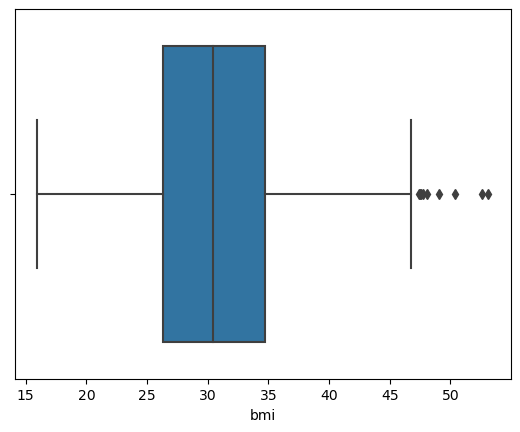

In [187]:
sns.boxplot(x = data['bmi'])

<AxesSubplot:xlabel='children'>

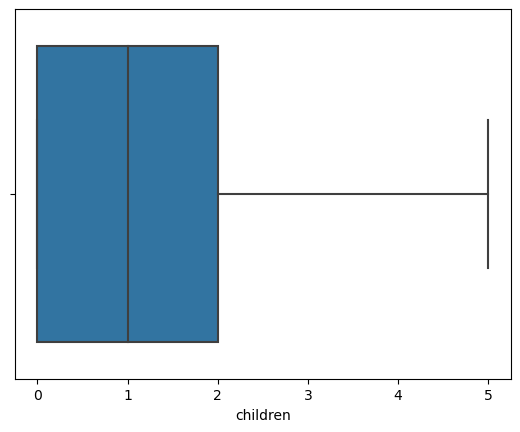

In [188]:
sns.boxplot(x = data['children'])

In [189]:
data1 = ['age','bmi','children','charges']
data1 = data[data1]

In [190]:
data.corr()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251,-0.039905,0.073982,-0.043210
sex_male,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185,-0.011156,0.017117,-0.004184
smoker_yes,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000,-0.036945,0.068498,-0.036945
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.011156,-0.036945,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.270025,-0.023066,0.073982,0.017117,0.068498,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.006205,0.021914,-0.043210,-0.004184,-0.036945,-0.320829,-0.346265,1.000000


## LINEAR REGRESSION
### SELECTION OF FEATURE AND TARGET FOR THE DATA



In [191]:
x = data['smoker_yes'].values.reshape(-1,1)
y = data["charges"]

### STANDARDIZATION

In [192]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(x)
print(scaled)

[[ 1.97058663]
 [-0.5074631 ]
 [-0.5074631 ]
 ...
 [-0.5074631 ]
 [-0.5074631 ]
 [ 1.97058663]]


### BIFIRCATE DATA INTO
1. TRAIN ---- 80%
2. TEST ----- 20%

In [193]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(scaled,y,test_size = 0.2, random_state =42)

### MODEL FITTING

In [194]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train,y_train)

model_pred = model.predict(x_test)

In [195]:
model.score(x_train,y_train)

0.6084975246707405

In [196]:
model.score(x_test,y_test)

0.6602486589056528

In [197]:
from sklearn import metrics
r2_score = metrics.r2_score(y_test,model_pred)
print('r2_score=', r2_score)

r2_score= 0.6602486589056528


In [198]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
folds = KFold(n_splits = 10, shuffle = True, random_state = 42)
scores = cross_val_score(lm, x_train, y_train, scoring='r2', cv=folds)
scores
accuracy_regfold = np.mean(abs(scores))
accuracy_regfold

0.601032733733869

In [199]:
model.score(x_train,y_train)

0.6084975246707405

In [200]:
model.score(x_test,y_test)

0.6602486589056528

### REGULARIZATION

In [201]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso()
lasso_reg.fit(x_train, y_train)

Lasso()

In [202]:
lasso_reg.score(x_train,y_train)

0.6084975177629619

In [203]:
lasso_reg.score(x_test,y_test)

0.6602375883745683

In [204]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge()
ridge_reg.fit(x_train, y_train)

Ridge()

In [205]:
ridge_reg.score(x_train,y_train)

0.6084969973266146

In [206]:
ridge_reg.score(x_test,y_test)

0.6601515045032204

In [207]:
from sklearn.linear_model import ElasticNet
En_reg= ElasticNet()
En_reg.fit(x_train, y_train)

ElasticNet()

In [208]:
En_reg.score(x_train, y_train)

0.5411405121616942

In [209]:
En_reg.score(x_test, y_test)

0.5640066811143002

## MULTIPLE REGRESSION
### SELECTION OF FEATURE AND TARGET FOR THE DATA



In [210]:
x1 = data.drop('charges', axis =1)
y1 = data["charges"]

### STANDARDIZATION

In [211]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled1 = scaler.fit_transform(x1)
print(scaled1)

[[-1.43876426 -0.45332    -0.90861367 ... -0.56641788 -0.61132367
   1.76548098]
 [-1.50996545  0.5096211  -0.07876719 ... -0.56641788  1.63579466
  -0.56641788]
 [-0.79795355  0.38330685  1.58092576 ... -0.56641788  1.63579466
  -0.56641788]
 ...
 [-1.50996545  1.0148781  -0.90861367 ... -0.56641788  1.63579466
  -0.56641788]
 [-1.29636188 -0.79781341 -0.90861367 ... -0.56641788 -0.61132367
   1.76548098]
 [ 1.55168573 -0.26138796 -0.90861367 ...  1.76548098 -0.61132367
  -0.56641788]]


### BIFIRCATE DATA INTO
    1. TRAIN ---- 80%
    2. TEST ----- 20%


In [212]:
from sklearn.model_selection import train_test_split
x1_train,x1_test, y1_train,y1_test = train_test_split(scaled1,y1,test_size = 0.2, random_state =42)

### MODEL FITTING

In [213]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x1_train,y1_train)

model_pred = model.predict(x1_test)

In [214]:
model.score(x1_train,y1_train)

0.7417255854683333

In [215]:
model.score(x1_test,y1_test)

0.7835929767120722

In [216]:
from sklearn import metrics
r2_score_1 = metrics.r2_score(y1_test,model_pred)
print('r2_score=', r2_score_1)

r2_score= 0.7835929767120722


##### train < test : which means the learning is self predictin data/self actualizing
##### hence it is overfitting

### K-FOLD

In [217]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

lm1 = LinearRegression()
folds1 = KFold(n_splits = 10, shuffle = True, random_state = 42)
scores1 = cross_val_score(lm1, x1_train, y1_train, scoring='r2', cv=folds1)
scores1
accuracy_regfold1 = np.mean(abs(scores1))
accuracy_regfold1

0.735589567023663

### GRID CV

In [218]:
folds1 = KFold(n_splits = 5, shuffle = True, random_state = 42)
hyper_params = [{'n_features_to_select': list(range(1, 14))}]

from sklearn.feature_selection import RFE
rfe = RFE(lm1)             

from sklearn.model_selection import GridSearchCV
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds1, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(x1_train, y1_train)        

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13]}],
             return_train_score=True, scoring='r2', verbose=1)

In [219]:
print(model_cv.best_params_)
print(model_cv.best_estimator_)

{'n_features_to_select': 6}
RFE(estimator=LinearRegression(), n_features_to_select=6)


In [220]:
rfe = RFE(model,n_features_to_select=6) 
y_cv_pred = model.predict(x1_test)


In [221]:
model.score(x1_train,y1_train)

0.7417255854683333

In [222]:
model.score(x1_test,y1_test)

0.7835929767120722

### REGULARIZATION

In [223]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso()
lasso_reg.fit(x1_train, y1_train)

Lasso()

In [224]:
lasso_reg.score(x1_train,y1_train)

0.7417254783250269

In [225]:
lasso_reg.score(x1_test,y1_test)

0.7835656905935344

In [226]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(x1_train, y1_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [227]:
ridge_reg.score(x1_train, y1_train)

0.7401763500019942

In [228]:
ridge_reg.score(x1_test, y1_test)

0.7796544369309187

In [229]:
from sklearn.linear_model import ElasticNet
En_reg= ElasticNet()
En_reg.fit(x1_train, y1_train)

ElasticNet()

In [230]:
En_reg.score(x1_train, y1_train)

0.6574899417106346

In [231]:
En_reg.score(x1_test, y1_test)

0.6835454864133703

In [232]:
! pip install pyforest
from pyforest import*
lazy_imports()

['import gensim',
 'import pydot',
 'from pyspark import SparkContext',
 'from PIL import Image',
 'import os',
 'import torch',
 'import plotly.express as px',
 'import seaborn as sns',
 'import textblob',
 'import spacy',
 'from sklearn.linear_model import Ridge',
 'import datetime as dt',
 'from sklearn.model_selection import cross_val_score',
 'from fbprophet import Prophet',
 'import pandas as pd',
 'from sklearn.model_selection import GridSearchCV',
 'from sklearn.preprocessing import OneHotEncoder',
 'from dask import dataframe as dd',
 'import altair as alt',
 'import lightgbm as lgb',
 'from sklearn.ensemble import RandomForestClassifier',
 'from pathlib import Path',
 'import cv2',
 'from statsmodels.tsa.arima_model import ARIMA',
 'import bokeh',
 'from openpyxl import load_workbook',
 'import imutils',
 'from sklearn.linear_model import LinearRegression',
 'from sklearn.preprocessing import RobustScaler',
 'from sklearn.preprocessing import LabelEncoder',
 'from sklearn.pre

### DESCISION TREE REGRESSION

In [233]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
model_DT= DT.fit(x1_train,y1_train)

In [234]:
model_DT.score(x1_train, y1_train)

0.9983078124756305

In [235]:
model_DT.score(x1_test, y1_test)

0.6881153664334758

In [236]:
folds2 = KFold(n_splits = 5, shuffle = True, random_state = 42)
hyper_params = [{'n_features_to_select': list(range(1, 14))}]

from sklearn.feature_selection import RFE
rfe = RFE(model_DT)             

from sklearn.model_selection import GridSearchCV
model_cv_dt = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds2, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv_dt.fit(x1_train, y1_train)        

<IPython.core.display.Javascript object>

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RFE(estimator=DecisionTreeRegressor()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13]}],
             return_train_score=True, scoring='r2', verbose=1)

In [237]:
print(model_cv_dt.best_params_)
print(model_cv_dt.best_estimator_)

{'n_features_to_select': 5}
RFE(estimator=DecisionTreeRegressor(), n_features_to_select=5)


In [238]:
rfe = RFE(model_cv_dt,n_features_to_select=model_cv_dt.best_params_) 
y_dt_pred = model_cv_dt.predict(x1_test)


In [239]:
model_cv_dt.score(x1_train, y1_train)

0.998304727194411

In [240]:
model_cv_dt.score(x1_test, y1_test)

0.7632242114974788

### RANDOM FOREST REGRESSOR

In [241]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
model_RF = RF.fit(x1_train, y1_train)

In [242]:
model_RF.score(x1_train, y1_train)

0.9746040280544018

In [243]:
model_RF.score(x1_test, y1_test)

0.868164483237601

In [244]:
folds3 = KFold(n_splits = 5, shuffle = True, random_state = 42)
hyper_params = [{'n_features_to_select': list(range(1, 14))}]

from sklearn.feature_selection import RFE
rfe = RFE(model_RF)             

from sklearn.model_selection import GridSearchCV
model_cv_rf = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds3, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv_rf.fit(x1_train, y1_train)  

<IPython.core.display.Javascript object>

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RFE(estimator=RandomForestRegressor()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13]}],
             return_train_score=True, scoring='r2', verbose=1)

In [245]:
print(model_cv_rf.best_params_)
print(model_cv_rf.best_estimator_)

{'n_features_to_select': 8}
RFE(estimator=RandomForestRegressor(), n_features_to_select=8)


In [246]:
rfe = RFE(model_cv_rf,n_features_to_select=model_cv_rf.best_params_) 
y_rf_pred = model_cv_rf.predict(x1_test)

In [247]:
model_cv_rf.score(x1_train, y1_train)

0.9751581318593009

In [248]:
model_cv_rf.score(x1_test, y1_test)

0.8653956502475828

# THE BEST MODEL

#### I have worked and used 4 different to find the best model to use.
##### I have applied these 4 different algorithms on the data set:

1. LINEAR REGRESSION
2. MULTIPLE REGRESSION
3. DECISION TREE REGRESSOR
4. RANDOM FOREST REGRESSOR

The model that works the best amongst all the 4 is **RANDOM FOREST REGRESSOR**

## PREDICTION OF DATA

In [250]:
x1.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


In [266]:
df = pd.read_excel('Predicting data.xlsx')
df.head()

<IPython.core.display.Javascript object>

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,0,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,0,0,0,1,0
4,32,28.880,0,0,1,0,0,1


In [252]:
df1 = df.to_numpy()

In [253]:
predict = model_cv_rf.predict(df1)
predict

array([17053.1012384, 16131.825027 , 25170.7071859, 16708.3624287,
       48637.9537539, 48637.9537539, 16288.6093827, 49852.489359 ,
       49852.489359 , 48858.541161 , 17053.1012384, 17053.1012384,
       17053.1012384])

In [254]:
charges = pd.DataFrame(predict)
charges

<IPython.core.display.Javascript object>

,0
0,17053.101238
1,16131.825027
2,25170.707186
3,16708.362429
4,48637.953754
5,48637.953754
6,16288.609383
7,49852.489359
8,49852.489359
9,48858.541161


In [255]:
datasets = [df, charges]

In [256]:
new_data = pd.concat([df, charges], axis =1)

<IPython.core.display.Javascript object>

In [265]:
new_data.head()

,Age,BMI,Children,sex is male,Smoking,Northwest_region,SouthEast_region,Southwest_region,charges
0,19,27.900,0,0,0,0,0,1,17053.101238
1,18,33.770,1,1,0,0,1,0,16131.825027
2,28,33.000,3,1,0,0,1,0,25170.707186
3,33,22.705,0,0,0,0,1,0,16708.362429
4,32,28.880,0,0,1,0,0,1,48637.953754


In [258]:
new_data.columns

Index([             'age',              'bmi',         'children',
               'sex_male',       'smoker_yes', 'region_northwest',
       'region_southeast', 'region_southwest',                  0],
      dtype='object')

In [261]:
new_data.rename(columns = {'age':'Age','bmi':'BMI','children':'Children','sex_male':'sex is male','smoker_yes':'Smoking', 
                           'region_northwest':'Northwest_region','region_southeast':'SouthEast_region',
                           'region_southwest':'Southwest_region',0:'Charges'}, inplace = True)

In [262]:
new_data.head()

,Age,BMI,Children,sex is male,Smoking,Northwest_region,SouthEast_region,Southwest_region,charges
0,19,27.900,0,0,0,0,0,1,17053.101238
1,18,33.770,1,1,0,0,1,0,16131.825027
2,28,33.000,3,1,0,0,1,0,25170.707186
3,33,22.705,0,0,0,0,1,0,16708.362429
4,32,28.880,0,0,1,0,0,1,48637.953754


#### HERE WE HAVE SELECTED THE RANDOM FOREST REGRESSOR MODEL, AND FUTHER PREDICTED THE INSURANCE CHARGES TOO FOR NEW DATASET GIVEN